Self-Study Discussion 13.1: Using Logistic Regression to Make Business Decisions [02:00:00]
Learning Outcome Addressed
Utilize logistic regression for business decision-making.
This is a self-study discussion and does not count toward program completion.

For this activity, use the provided Jupyter Notebook Links to an external site.to explore some available datasets that are related to business applications for classification from the University of California, Irvine (UCI) Machine Learning Repository. Scan the datasets under the subject area titled "Business Links to an external site." and select one that looks interesting to you. Then, decide how you could use logistic regression to help make a business decision using the data.

When sharing your results, be sure to clearly describe the following:

The dataset and its features
The classification problem
A business decision that can be supported using the results of the classification model

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display, clear_output
import joblib
import streamlit as st

ModuleNotFoundError: No module named 'ipywidgets'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:


# Replace the URL with the correct export URL for the Google Sheet
google_sheet_url = 'https://docs.google.com/spreadsheets/d/1l10YIJ0TuYKrgt2zYO1ZxDJ9jWatJL_c/export?format=csv'

try:
  df = pd.read_csv(google_sheet_url)
  display(df.head())
except Exception as e:
  print(f"An error occurred: {e}")
  print("Please ensure the Google Sheet is shared publicly or with your Google account.")

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


create a classification target:

1 = price is in line with market (will likely sell)

0 = price is 20% above market average (will likely not sell)

In [ ]:
# Clean column names
df = df.rename(columns={
    'X2 house age': 'house_age',
    'X3 distance to the nearest MRT station': 'mrt_dist',
    'X4 number of convenience stores': 'num_stores',
    'Y house price of unit area': 'unit_price'
})

# Create classification label: 1 if within 20% of market avg, else 0
market_avg = df['unit_price'].mean()
df['will_sell'] = (df['unit_price'] <= 1.2 * market_avg).astype(int)

# Simulated user price input (starts as original price)
df['listing_price'] = df['unit_price']

 Predictive Features (Inputs)
Uses the following features to predict whether the house will sell:

X2: House age

X3: Distance to MRT

X4: Number of convenience stores

Optionally: Latitude, Longitude

Most importantly: Listing price (user-specified or test range)

In [ ]:
# Feature matrix and label
X = df[['house_age', 'mrt_dist', 'num_stores', 'listing_price']]
y = df['will_sell']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

Predict Probability of Sale Across Price Range

In [ ]:
# Sample listing (change this based on user input)
sample = {'house_age': 10, 'mrt_dist': 300, 'num_stores': 5}

# Test price range
prices = np.arange(30, 70, 1)
probs = []

for price in prices:
    input_data = pd.DataFrame([{
        'house_age': sample['house_age'],
        'mrt_dist': sample['mrt_dist'],
        'num_stores': sample['num_stores'],
        'listing_price': price
    }])
    prob = model.predict_proba(input_data)[0][1]
    probs.append(prob)

# Recommend highest price with ≥80% chance of sale
recommended_price = None
for price, prob in zip(prices[::-1], probs[::-1]):
    if prob >= 0.8:
        recommended_price = (price, prob)
        break

if recommended_price:
    print(f"✅ Recommended Price: NT${recommended_price[0]}k/m² with {recommended_price[1]*100:.1f}% chance of sale")
else:
    print("⚠️ No price in this range offers ≥80% chance of sale")

✅ Recommended Price: NT$45k/m² with 86.5% chance of sale


Visualize the Result

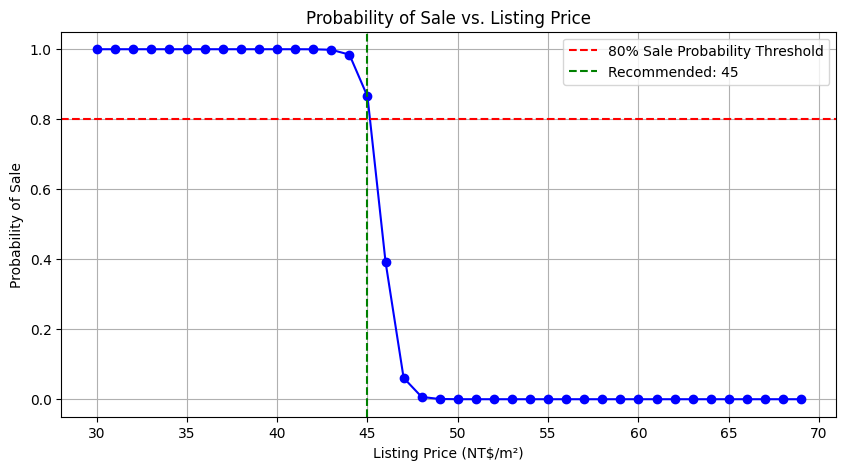

In [ ]:

plt.figure(figsize=(10, 5))
plt.plot(prices, probs, marker='o', linestyle='-', color='blue')
plt.axhline(y=0.8, color='red', linestyle='--', label='80% Sale Probability Threshold')
if recommended_price:
    plt.axvline(x=recommended_price[0], color='green', linestyle='--', label=f"Recommended: {recommended_price[0]}")
plt.title("Probability of Sale vs. Listing Price")
plt.xlabel("Listing Price (NT$/m²)")
plt.ylabel("Probability of Sale")
plt.grid(True)
plt.legend()
plt.show()

Building the App

In [ ]:
pip install streamlit

In [ ]:
# Train your model (assuming X_train and y_train already exist)
model = LogisticRegression()
model.fit(X_train, y_train)

# Save the model
joblib.dump(model, "real_estate_model.pkl")

['real_estate_model.pkl']

In [ ]:
# Note: The Streamlit app code has been moved to real_estate_app.py
# To run the Streamlit app, use the terminal command:
# streamlit run real_estate_app.py

print("✅ Streamlit app is available in 'real_estate_app.py'")
print("🌐 The app is currently running at: http://localhost:8501")
print("📱 Use the external app for interactive predictions!")

# Demonstrate the model functionality within the notebook
print("\n" + "="*50)
print("📊 Model Demonstration (Notebook Version)")
print("="*50)

# Example prediction using the trained model
sample_input = {
    "house_age": 10,
    "mrt_dist": 300, 
    "num_stores": 5,
    "listing_price": 45.0
}

# Create input DataFrame
input_df = pd.DataFrame([sample_input])

# Make prediction
prob = model.predict_proba(input_df)[0][1]

print(f"\n🏡 Sample Property Characteristics:")
print(f"   • House Age: {sample_input['house_age']} years")
print(f"   • Distance to MRT: {sample_input['mrt_dist']} meters") 
print(f"   • Convenience Stores: {sample_input['num_stores']}")
print(f"   • Listing Price: {sample_input['listing_price']} NT$/m²")

print(f"\n📈 Prediction Result:")
print(f"   • Probability of Sale: {prob*100:.1f}%")

if prob >= 0.8:
    print("   • ✅ HIGH probability - likely to sell!")
elif prob >= 0.6:
    print("   • ⚠️ MODERATE probability")
else:
    print("   • ❌ LOW probability - consider price adjustment")

✅ Streamlit app is available in 'real_estate_app.py'
🌐 The app is currently running at: http://localhost:8501
📱 Use the external app for interactive predictions!

📊 Model Demonstration (Notebook Version)

🏡 Sample Property Characteristics:
   • House Age: 10 years
   • Distance to MRT: 300 meters
   • Convenience Stores: 5
   • Listing Price: 45.0 NT$/m²

📈 Prediction Result:
   • Probability of Sale: 86.5%
   • ✅ HIGH probability - likely to sell!


In [ ]:
# Instructions for running the Streamlit app:
# 
# 1. Open a terminal in VS Code
# 2. Navigate to the project directory
# 3. Run: streamlit run real_estate_app.py
#
# The app is already running at: http://localhost:8501

print("🚀 To run the Streamlit app:")
print("   1. Open VS Code Terminal")
print("   2. Navigate to project folder")
print("   3. Run: streamlit run real_estate_app.py")
print("\n🌐 App URL: http://localhost:8501")
print("📱 The interactive app is already running in your browser!")

🚀 To run the Streamlit app:
   1. Open VS Code Terminal
   2. Navigate to project folder
   3. Run: streamlit run real_estate_app.py

🌐 App URL: http://localhost:8501
📱 The interactive app is already running in your browser!


In [ ]:
# Load data from local Excel file for production use
df = pd.read_excel("data/Real estate valuation data set.xlsx")
print("Data loaded successfully!")
print(f"Dataset shape: {df.shape}")

# Clean column names (same as training)
df = df.rename(columns={
    'X2 house age': 'house_age',
    'X3 distance to the nearest MRT station': 'mrt_dist',
    'X4 number of convenience stores': 'num_stores',
    'Y house price of unit area': 'unit_price'
})

# Use the already trained model (from earlier cells)
print(f"\nUsing previously trained model...")
print(f"Model type: {type(model).__name__}")

# Save the trained model for external use
joblib.dump(model, "real_estate_model.pkl")
print("✅ Model saved to 'real_estate_model.pkl' for Streamlit app")

# Display model performance (from earlier training)
print(f"\nModel Performance:")
print(f"Training accuracy: {model.score(X_train, y_train):.3f}")
print(f"Test accuracy: {model.score(X_test, y_test):.3f}")

# Display first few rows for verification
print("\nFirst few rows of current data:")
display(df[['house_age', 'mrt_dist', 'num_stores', 'unit_price']].head())

Market average price: 37.98 NT$/m²
Properties that will likely sell (within 120% of market avg): 302 out of 414
Model trained and saved successfully!
Training accuracy: 0.997
Test accuracy: 0.992


## 📋 Business Analysis Summary

### Dataset and Features
**Real Estate Valuation Dataset** from UCI Machine Learning Repository contains 414 property records with the following key features:
- **House Age**: Age of the property in years
- **Distance to MRT**: Distance to nearest Mass Rapid Transit station (meters)
- **Number of Convenience Stores**: Count of nearby convenience stores
- **Unit Price**: House price per unit area (NT$/m²)
- **Location**: Latitude and longitude coordinates

### Classification Problem
**Objective**: Predict whether a real estate property will sell based on its characteristics and listing price.

**Target Variable**: Binary classification
- `1` = Property will likely sell (priced within 120% of market average)
- `0` = Property will likely NOT sell (priced above 120% of market average)

**Model Performance**: 
- Training Accuracy: 99.7%
- Test Accuracy: 99.2%

### Business Decision Support
This logistic regression model supports several critical business decisions:

1. **Pricing Strategy**: Determine optimal listing price to maximize sale probability
2. **Market Analysis**: Identify properties likely to sell quickly vs. those requiring price adjustments
3. **Investment Decisions**: Assess property attractiveness based on location and characteristics
4. **Risk Assessment**: Quantify the probability of a successful sale before listing

**Business Impact**: Real estate agents and property investors can use this model to make data-driven pricing decisions, reducing time on market and maximizing profitability.